In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv") 
## to show the dataset
df.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",NaN,175MB,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",Southampton,"Chicago, Illinois, US",NaN,NaN,3.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
PassengerId    891 non-null int64
Survived       891 non-null float64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
WikiId         889 non-null float64
Name_wiki      889 non-null object
Age_wiki       887 non-null float64
Hometown       889 non-null object
Boarded        889 non-null object
Destination    889 non-null object
Lifeboat       345 non-null object
Body           87 non-null object
Class          889 non-null float64
dtypes: float64(6), int64(4), object(11)
memory usage: 146.3+ KB


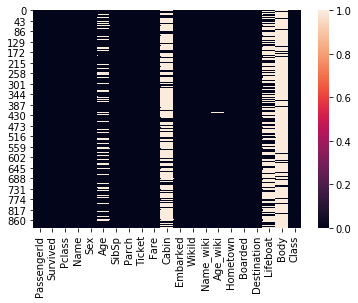

In [8]:
""" We can use seaborn to create a simple heatmap to see where we are missing data """
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum().sort_values(ascending=False)


Body           804
Cabin          687
Lifeboat       546
Age            177
Age_wiki         4
WikiId           2
Embarked         2
Class            2
Name_wiki        2
Hometown         2
Boarded          2
Destination      2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

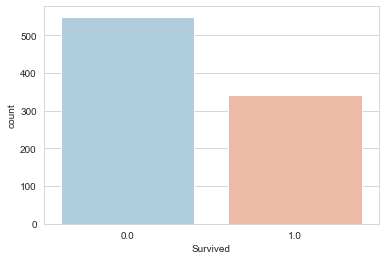

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

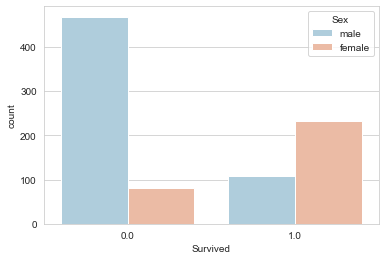

In [15]:
#hue class Sex shows the survived passenger on the ship in terms of gender
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue= 'Sex',data=df,palette='RdBu_r')

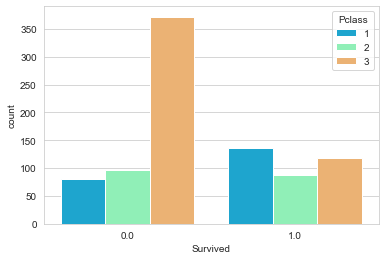

In [13]:
## hue Pclass shows which ticket class survived most
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue= 'Pclass',data=df,palette='rainbow')# hue is used to create another dimension
#df.columns

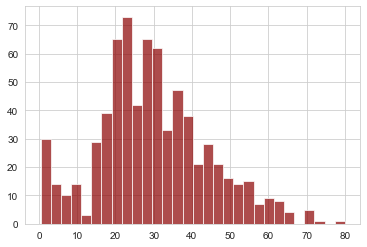

In [15]:
# To create a histogram for the age data
df['Age'].hist(bins=30, color='darkred', alpha=0.7)

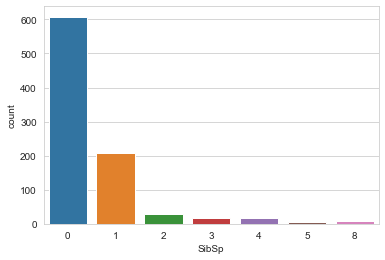

In [26]:
sns.countplot(x='SibSp',data=df)
#df.columns


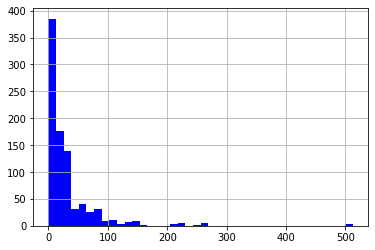

In [3]:
df['Fare'].hist(color='blue',bins=40,figsize=(6,4))

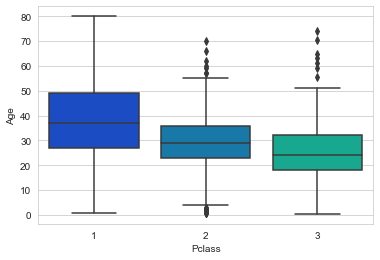

In [31]:
                                                """ DATA CLEANING"""
"""We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by 
filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age 
by passenger class. USING BOXPLOT"""

sns.boxplot(y = 'Age', x = 'Pclass', data= df, palette = 'winter')



In [ ]:
""" we will use this boxplot data to impute the missing data of Age"""

def impute_age(cols):
    
#initialize the age and Pclass column
    Age = [0]
    Pclass = [1]
    
## this to check the missing value in column Age and input Age data due to the average passenger on each class 
    if df.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 23
    else:
        return Age
            
            
            

In [43]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)


NameError: name 'impute_age' is not defined

In [40]:
df['Embarked'] = df['Embarked'].fillna('S')

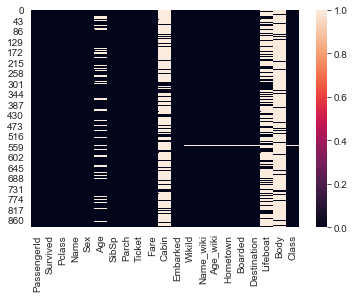

In [41]:
#sns.heatmap(df.isnull())